# Assignment 1 | Regression

## Group F:
### Almpes Kotzai: 201968817 
### Roberto Plaza: 201953526
### Constantinos Economides: 201984019
### Andreas Neofytou: 201963027


## Table of contents

1. [Introduction](#Introduction)

2. [The problem domain](#The-problem-domain)

3. [Data processing](#Data-processing)
    
    - [Loading modules](#Loading-modules)
    
    - [Loading data](#Loading-data)
    
    - [Data handling](#Data-handling)
    
    - [Correlation and feature engineering](#Correlation-and-feature-engineering)
    
    - [One-hot encoding](#One-hot-encoding)
    
    - [Train-test split](#Train-test-split) 

4. [Regression](#Regression)
    
    - [Linear Regression](#Linear-Regression)
    - [Ridge Regression](#Ridge-Regression)
    - [Random Forest Regressor](#Random-Forest-Regressor)
    - [XGB Regressor](#XGB-Regressor)
    - [Bagging Regressor](#Bagging-Regression)
    - [Ada Boost Regressor](#Ada-Boost-Regressor)
    - [Ensembles](#Ensembles)

5 . [Kaggle score | Conclusion](#Kaggle-score-|-Conclusion)
    
 [Required libraries](#Required-libraries)
 
 [References](#Required-libraries)
 
 

## Introduction

[[ go back to the top ]](#Table-of-contents)

In this notebook we present a step by step process on trying to solve the regression problem for the course CS985: Machine Learning for Data Analytics being 1/2 of the marks for the first assignment.

First we go through the data handling/cleaning, one-hot encoding, and generating the appropriate shapes for the X, y train and target datasets from train we use a the standard workflow to input the data and use $R^2$ score mostly along with mean squared error for chosen models. 

## The problem domain
[[ go back to the top ]](#Table-of-contents)

Our task for this part of the class assignment is to build a model to predict the popularity of a song. The data provided is drawn from [Nicolas Carbone's <i>Spotify Past Decades Songs Attributes
Spotify attributes of songs from all available past decades (50s - 10s)</i>](https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s) 

The challenge is to build a good machine learning model that is able to predict the popularity of a song. Popularity is an integer value so we are treating this as a regression problem. 


## Data processing
[[ go back to the top ]](#Table-of-contents)

### Loading modules
[[ go back to the top ]](#Table-of-contents)

In [1]:
# basics
import numpy as np # Linear Algebra as well
import pandas as pd # Dataframes
import matplotlib.pyplot as plt # Plotting
import pkg_resources
import types

import seaborn as sns # Plotting and Stats
import os # for file reading
import time # for time keeping
import warnings
warnings.filterwarnings('ignore')

# stats
from scipy import stats

# Preprocessing, model_selection and decomposition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer # slightly better than StandardScaler
from sklearn.preprocessing import RobustScaler # slightly worse than Standard Scaler

# Pipeline
from sklearn.pipeline import make_pipeline # when playing with polynomial transformations mostly

# Metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# Machine Learning
from sklearn.svm import SVC # SVM for regression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor 
import xgboost # Gradient Descent Strategy

### Loading Data
[[ go back to the top ]](#Table-of-contents)

In [2]:
def load_data(path):
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            full_path = os.path.join(dirname, filename)
            print(full_path)
            if "Test" in filename:
                test = pd.read_csv(full_path)
            else:
                train = pd.read_csv(full_path)
                
    return train, test
train, test = load_data('./cs98x-spotify-regression')

./cs98x-spotify-regression/CS98XRegressionTest.csv
./cs98x-spotify-regression/CS98XRegressionTrain.csv


Checking the data 

In [3]:
train.head(5)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


### Data Handling
[[ go back to the top ]](#Table-of-contents)

Combining train and test by stacking them one
after the other, this is done with keys so we can
de-select them correctly at the end. 

In [4]:
# merge train and test 
sel_data = pd.concat([train, test], keys=[0,1])

Checking the combined dataset

In [5]:
sel_data.head(5)

Id                                        title            artist  \
0 0   1                                 My Happiness    Connie Francis   
  1   2                             Unchained Melody   The Teddy Bears   
  2   3                        How Deep Is Your Love          Bee Gees   
  3   4                                Woman in Love  Barbra Streisand   
  4   5  Goodbye Yellow Brick Road - Remastered 2014        Elton John   

           top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0 0  adult standards  1996  107    31    45  -8    13   28  150     75     3   
  1              NaN  2011  114    44    53  -8    13   47  139     49     3   
  2  adult standards  1979  105    36    63  -9    13   67  245     11     3   
  3  adult standards  1980  170    28    47 -16    13   33  232     25     3   
  4        glam rock  1973  121    47    56  -8    15   40  193     45     3   

      pop  
0 0  44.0  
  1  37.0  
  2  77.0  
  3  67.0  
  4  63.0

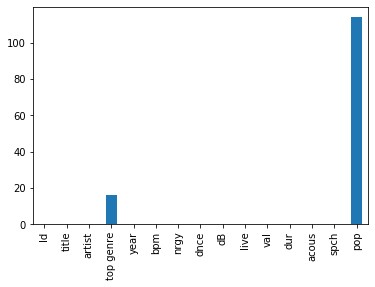

In [6]:
# check what values are null/nan's
sel_data.isnull().sum().plot(kind='bar')

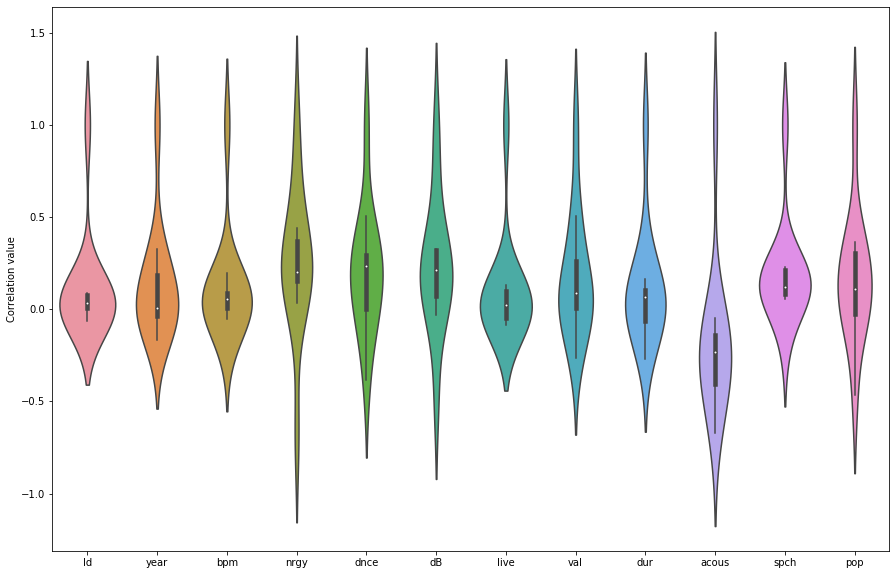

In [7]:
# white dot shows median
# interquartile range (black bar in center of violin)
# upper adjacent value desribes third quartile
# lower adjecent value describes first quartile
# observations lying outside of the quartiles can be considered outliers

corr = sel_data.corr()
plt.figure(figsize=(15,10))
plt.ylabel("Correlation value")
sns.violinplot(data=corr)
plt.show()

Mainly 'pop' and 'top genre' have nan's so we fill
'pop' with the mean and 'top genre' with the mode
in this case 'adult standards'. 'inplace=true' so the operation does not return a copy of the dataframe and in general this is good practise for minimal memory consumption as the data grows. There are other ways to do this of course, by using the max, min values also "None" in the case of categorical values etc.

We are also dropping Id, as it mostly numerical ascent type of values which we believe is not highly important for the outcome of the popularity score. Title is chosen without much scientifc basis but mostly to not get a huge dataset of the order of 1000+ columns with one hot encoding as the with the increase of columns/features the course of dimensionality takes over and computation and complexity increase hand in hand.

In [8]:
# fill nan's and nulls accordingly to chosen method
sel_data['pop'].fillna(sel_data['pop'].mean(), inplace=True)
sel_data['top genre'].fillna("adult standards", inplace=True)
# drop columns Id and title
sel_data.drop(columns=["Id", "title"], inplace=True)

# check if changes went through
sel_data.isnull().sum()

artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

### Correlation and feature engineering
[[ go back to the top ]](#Table-of-contents)

Next we check for correlations for the given features, to see if we can find anything interesting or how to proceeding on simple feature engineering or feature selection.

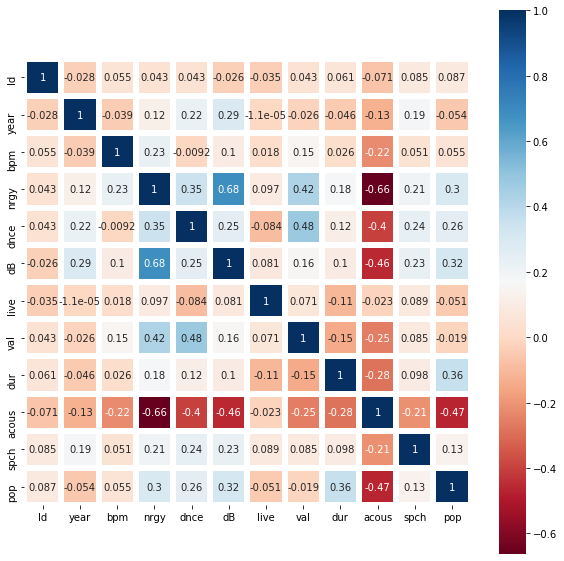

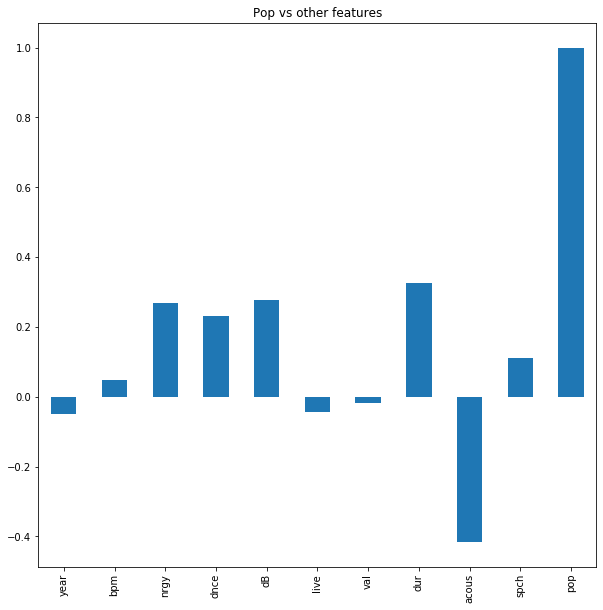

In [9]:
# get the correlation from the selected dataset
corr = sel_data.corr()

# plot the heat-map correlation
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

colormap = plt.cm.RdBu
sns.heatmap(train.corr(),linewidths=5,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True,ax=ax)
# plot a barplot of correlations with our target of interest
# in this case pop vs the rest
plt.figure(figsize=(10,10))
corr['pop'].plot(kind='bar', title="Pop vs other features")

We see that pop, except itself, correlates highly with nrgy, dnce, dB and acous (negatively with the latter). We used this information to construct 3 new features with care to be linearly indpended, by summing some of them up and diving by the other and by transforming it with a logarithm. This actually helped improve the model further for both regression and classification parts of this assignment.

In [10]:
# creating new features using the neat dictionary capability of pandas
sel_data['(dB+bpm)/dur'] = (sel_data['dB'] + sel_data['bpm'])/sel_data['dur'] 
sel_data['log(dur+dB+nrgy)'] = np.log(sel_data['dur'] + sel_data['dB'] + sel_data['nrgy'])
sel_data['log(dur+dB+nrgy+dnce)'] = np.log(sel_data['dur'] + sel_data['dB'] + sel_data['nrgy'] + sel_data['dnce'])

The final 3 columns, one negatively and 2 positively correlated bars show the linear dependence with pop but also that they are way stronger than dB, acous, bpm, dnce, nrgy and dur themselves. (Discuss a bit quickly loudness war, and how maybe with plot of dB over the years, we see that more popular songs have stronger/louder audio...)

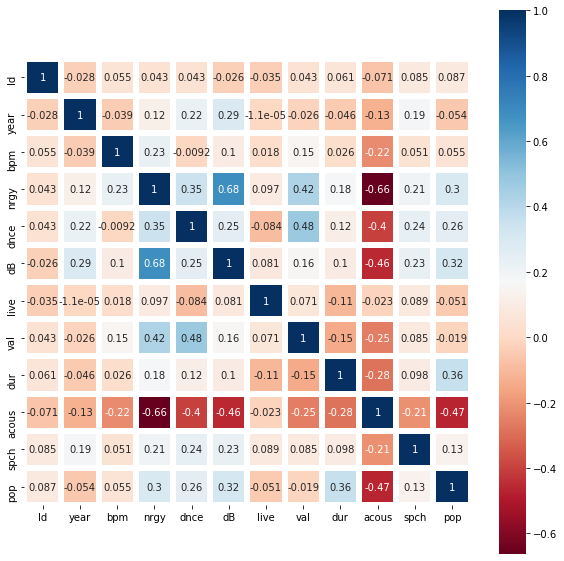

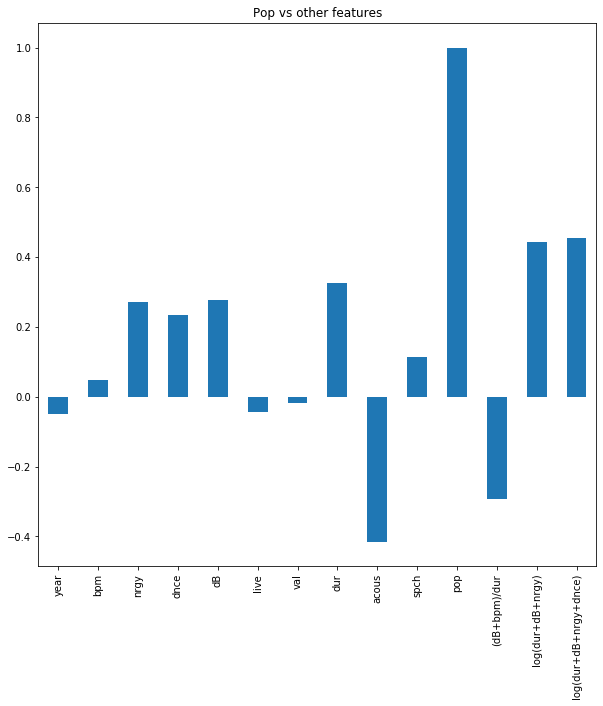

In [11]:
# get the new correlation from the selected dataset
corr = sel_data.corr()

# plot the heat-map correlation
# plot the heat-map correlation
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

colormap = plt.cm.RdBu
sns.heatmap(train.corr(),linewidths=5,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True,ax=ax)
# plot a barplot of correlations with our target of interest
# in this case pop vs the rest
plt.figure(figsize=(10,10))
corr['pop'].plot(kind='bar', title="Pop vs other features")

### One-hot encoding 
[[ go back to the top ]](#Table-of-contents)

Using also 'drop_first=True' as this according to theory and we saw in practise as well working on both regression and classification helps with the overall increase in the score metrics respectively when applying the method 'get_dummies()'.

In [12]:
sel_data = pd.get_dummies(sel_data, columns=["artist", "top genre"], drop_first=True)

### Train-test split
[[ go back to the top ]](#Table-of-contents)

Using the carefully but simple approach of keeping key-value pairs for the train-test merge, we can now safely eject the train and test sets, into the Xtrain and Xtest which are one-hot encoded versions of them. Care is taken to delete the 'pop' category copy from the enhanced test set so we do not get overfiting and leaking information to the score evaluation.

In [13]:
# split selected dataset using the keys defined previously
Xtrain, Xtest = sel_data.xs(0), sel_data.xs(1)

# delete 'pop' copy from one-hot encoded test set
Xtest.drop(columns='pop', inplace=True)

# print the shapes
print(Xtrain.shape)
print(Xtest.shape)
print(type(Xtrain))

(453, 519)
(114, 518)
<class 'pandas.core.frame.DataFrame'>


We split the Xtrain further to X data matrix and y target series and then we split the X, y to further X_train, X_test, y_train, y_test so we have the universal format of the data to be processed correctly by sci-kit learn's machine learning classes/objects and to extend their configurability for every model available in the library.

This also enables us to verify the accuracy of our models rather than using all the train data to get a higher score without realising the generalisation the model is doing and is good practise in general. This means we get less data to train ( 453 rows ) and as the <i> no free lunch theorem </i> states, this might affect our models performances because it has been proven over and over again that with more data, either synthetic generation, expert labelling or other methods, every machine learning model can actually increase in accuracy rapidly. However, we do this as we mentioned that it makes data analysis easier, and it helps with accuracy metrics substantially.

In [14]:
# split Xtrain to X, y 
X = Xtrain.loc[:, Xtrain.columns!='pop']
y = Xtrain.loc[:, 'pop']

# Scaling data before for better score and better model regression
pt = PowerTransformer(copy=False)
pt.fit_transform(X,y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)

## Regression
[[ go back to the top ]](#Table-of-contents)

For this part machine learning models can be easily applied since the data is in the right format. From a variety of models tried we mostly gonna focus on a sub-sample that did better than them.

Support vector machines did not do as well in this task. Even though they are usually efficient with more features than samples, this happens mostly in classification and note in regression based on our experience. Neural networks are not considered at all for this task as well, mostly cause they are material for the second part of the course. 

Linear models were used with LinearRegression as a benchmark along with a random benchmark model. ElasticNet models on regression did not perform as well but Ridge on the other hand perform rapidly and efficiently albeit not with the highest score. 

On tree models, Random Forests did quite well and an additional tree example output showed how the engineered features are quite important into diving the data right albeit using only max_depth=5 to not overfit. XGBoost is also used, calculating the errors and propagating them forward along with adaboost which did well as well. 

After doing bagging regression with XGBoost, we combined it with Random Forrests and ADABoost in a VotingRegressor model to get the highest score for this notebook on the leaderboard with RMSE: 6.94846.

Lastly we tried grid search cv and random search cv to get better parameters but they did not help much. Probably it would have been more helpful with more data if we really want to get more accuracy but in our experience for this dataset we mostly got results by intuition like choosing the tree depth at 5 to not overfit etc. An example output is left for random forests though to show how it would have worked and our knolwedge on it. 

The ensemble also containes a bagging regressor and ada boost regressor but either way this was the best combination through trial to get a higher score with our current models. 

In [15]:
# creating a dictionary to save the time taken for each model
# the R^2 scores for each model
# and the RMSE for each model indluding ensemble
# lr: LinearRegression, xgb: XGBRegressor, xgbrgr: Bagging Regressor with XGBReggressor
# ada : AdaBoostRegressor, rf: Random Forest Regresssor, rd: Ridge, ens: Ensemble model
models = {}
values = {}

time_taken = dict(zip(models, values))
scores = dict(zip(models, values))
rmse = dict(zip(models, values))

### Linear Regression
[[ go back to the top ]](#Table-of-contents)

LinearRegression class is our benchmark

In [16]:
start = time.time()

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

end = time.time()
difference = end - start

score = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
r = np.sqrt(mean_squared_error(y_test, y_pred))

time_taken['lr'] = round(difference, 4)
scores['lr'] = score
rmse['lr'] = r

print("Time taken: {0:4f} (s)".format(difference))
print("lr score: {0}".format(score))
print("lr rmse: {0}".format(r))

Time taken: 0.029609 (s)
lr score: -1.8519842358765228e+18
lr rmse: 20286438936.34063


### Ridge Regression
[[ go back to the top ]](#Table-of-contents)

In [17]:
rd = make_pipeline(PolynomialFeatures(1),
                          linear_model.Ridge(random_state=42, alpha=1e-5))

start = time.time()

rd.fit(X_train, y_train)

end = time.time()
difference = end - start

score = rd.score(X_test, y_test)
y_pred = rd.predict(X_test)
r = np.sqrt(mean_squared_error(y_test, y_pred))

time_taken['rd'] = round(difference, 4)
scores['rd'] = score
rmse['rd'] = r

print("Time taken: {0:4f} (s)".format(difference))
print("rd score: {0}".format(score))
print("rd rmse: {0}".format(r))

Time taken: 0.013314 (s)
rd score: 0.4281319673461913
rd rmse: 11.272885227425162


### Random Forest Regressor
[[ go back to the top ]](#Table-of-contents)

In [18]:
rf = RandomForestRegressor(n_estimators=700, n_jobs=-1, max_depth=5, random_state=42)

start = time.time()

rf.fit(X_train, y_train)

end = time.time()
difference = end - start

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
r = np.sqrt(mean_squared_error(y_test, y_pred))

time_taken['rf'] = round(difference, 4)
scores['rf'] = score
rmse['rf'] = r

print("Time taken: {0:4f} (s)".format(difference))
print("rf score: {0}".format(score))
print("rf rmse: {0}".format(r))

Time taken: 1.712801 (s)
rf score: 0.596956685192358
rf rmse: 9.463745141464129


Visualising a tree sub sample

In [19]:
from sklearn import tree
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = y_train.values,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Example cross validation for random forests

In [20]:
scores = cross_val_score(rf, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

scores

array([-122.52022717, -126.52412344, -100.49524649, -100.1120569 ])

Example grid search for random forest

In [21]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [100, 150, 200, 300],
            "max_depth"         : [10,12,25],
            "bootstrap": [True, False],
            "random_state": [42]
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=2)
    
    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()
    d = end - start
    print("Time taken for grid search: {0:.4} (s)".format(d))

    return grid.best_score_ , grid.best_params_

As seen, the values are not greater in comparison to the values picked by hand in this case

In [22]:
best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
print(best_score, best_params)

Time taken for grid search: 19.08 (s)
0.3308867638884908 {'bootstrap': True, 'max_depth': 10, 'n_estimators': 300, 'random_state': 42}


### XGB Regressor
[[ go back to the top ]](#Table-of-contents)

In [23]:
# XGboost algorithm 
xgb = xgboost.XGBRegressor(n_estimators=300, learning_rate=0.08, gamma=0.1, subsample=0.75,
                           colsample_bytree=1, max_depth=5, n_jobs=-1, random_state=42)

start = time.time()

xgb.fit(X_train,y_train)

end = time.time()
difference = end - start

score = xgb.score(X_test, y_test)
y_pred = xgb.predict(X_test)
r = np.sqrt(mean_squared_error(y_test, y_pred))

time_taken['xgb'] = round(difference, 4)
rmse['xgb'] = r

print("Time taken: {0:4f} (s)".format(difference))
print("xgb rmse: {0}".format(r))

[21:49:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken: 1.204047 (s)
xgb rmse: 10.088065779442768


Example grid search xv for xgb model

In [24]:
param_grid = {
        'max_depth': [5, 10, 15],
        'learning_rate': [0.001, 0.01, 0.1],
        'subsample': [0.5, 0.6, 0.7],
        'colsample_bytree': [0.5, 1],
        'gamma': [0, 0.25, 0.5, 1.0],
        
        'n_estimators': [100]}

rs_clf = GridSearchCV(xgb, param_grid,
                            n_jobs=-1, verbose=1, cv=2)
print("Grid search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train)
print("Grid search time:", time.time() - search_time_start)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Grid search..
Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.6min finished


[21:51:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Grid search time: 95.04484295845032
Best score: 0.3458591899692463
Best params: 
colsample_bytree: 0.5
gamma: 1.0
learning_rate: 0.1
max_depth: 5
n_estimators: 100
subsample: 0.6


### Bagging Regressor
[[ go back to the top ]](#Table-of-contents)

In [25]:
# Bagging regression with xgb model above
start = time.time()

regr = BaggingRegressor(base_estimator=xgb,
                        n_estimators=20, 
                        random_state=42, 
                        n_jobs=-1).fit(X_train, y_train)

end = time.time()
difference = end - start

score = regr.score(X_test, y_test)
y_pred = regr.predict(X_test)
r = np.sqrt(mean_squared_error(y_test, y_pred))

time_taken['xgbregr'] = round(difference, 4)
rmse['xgbregr'] = r

print("Time taken: {0:4f} (s)".format(difference))
print("xgbregr rmse: {0}".format(r))

Time taken: 21.461501 (s)
xgbregr rmse: 9.53826295978977


### Ada Boost Regressor
[[ go back to the top ]](#Table-of-contents)

In [26]:
# Technically an ensemble model where default estimator is a decision tree, 
# it uses different weights as its trained to focus on more difficul cases!
ada = AdaBoostRegressor(random_state=42, n_estimators=1)

start = time.time()

ada.fit(X_train, y_train)

end = time.time()
difference = end - start

score = ada.score(X_test, y_test)
y_pred = ada.predict(X_test)
r = np.sqrt(mean_squared_error(y_test, y_pred))

time_taken['ada'] = round(difference, 4)
rmse['ada'] = r

print("Time taken: {0:4f} (s)".format(difference))
print("ada rmse: {0}".format(r))

Time taken: 0.012641 (s)
ada rmse: 9.900149227565503


### Ensembles
[[ go back to the top ]](#Table-of-contents)

In [27]:
#create a dictionary of our best models
estimators=[ ('rf', rf), ('xgbrgr', regr), ('ada', ada)] 
#create our voting classifier, inputting our models
ens = VotingRegressor(estimators, n_jobs=-1) 

In [28]:
start = time.time()

ens.fit(X_train, y_train)#test our model on the test data

end = time.time()
difference = end - start

score = ens.score(X_test, y_test)
y_pred = ens.predict(X_test)
r = np.sqrt(mean_squared_error(y_test, y_pred))

time_taken['ens'] = round(difference, 4)
rmse['ens'] = r

print("Time taken: {0:4f} (s)".format(difference))
print("ens rmse: {0}".format(r))

Time taken: 22.495016 (s)
ens rmse: 9.219319520470629


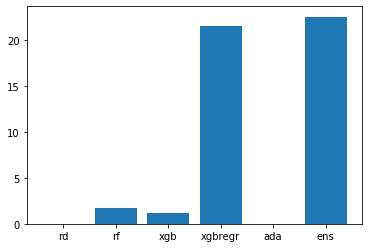

In [29]:
# removing outlier lr for better visualisation
time_taken.pop("lr", None)
rmse.pop("lr", None)

def plot_dict(dictionary):
    plt.bar(range(len(dictionary)), list(dictionary.values()), align='center')
    plt.xticks(range(len(dictionary)), list(dictionary.keys()))

plot_dict(time_taken)

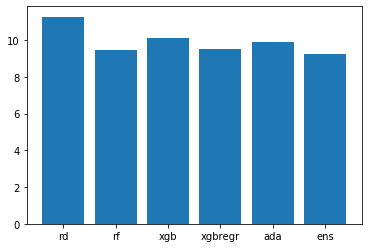

In [30]:
plot_dict(rmse)

## Kaggle score | Conclusion

Even though the public score is RMSE: 6.94846, the one for the model offline is a bit worse. But that is ok as it shows our ensemble model has generalised nicely, without hopefull our metrics being wrong. All in all, the data analysis for this problem was rather interesting, and feature engineering actually helped produce relatively better scores than without them showing the insight gained from such analysis. The ensemble models in general can perform better, but in our case the time taken to so so its in the relative seconds mark, and albeit the ensemble taking slightly more than the bagging regressor xgb it still gives the lowest RMSE from all models. 

## Required libraries
[based on this solution](https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook#40429176)

In [31]:
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.10.0
scipy==1.4.1
scikit-learn==0.22.1
pandas==1.0.1
numpy==1.18.1
matplotlib==3.1.3


## References

1. VanderPlas J. Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc."; 2016 Nov 21.

2. Géron A. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media; 2019 Sep 5.

3. Müller AC, Guido S. Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc."; 2016 Sep 26.